<a href="https://colab.research.google.com/github/tiyu0203/fml/blob/master/FML_proj5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Frequentist Machine Learning**

**Assignment 5**

**Jonathan Lam, Tiffany Yu, Harris Paspuleti**

---
## Defining the Models

We use the `xgboost` package for gradient-boosted trees and the sklearn `RandomForestRegressor` for random forests.

In [ ]:
!pip install xgboost==1.2.0

# setting up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# sklearn utility functions for training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

plt.rcParams['figure.figsize'] = [12, 12]


# define regressor models for both XGB and RF ensemble models
class Regressor:

    def __init__(self, X_train, X_test, y_train, y_test, feature_names, n_trees):
        self.feature_names = feature_names
        self.trees = list(range(1, n_trees))
        self._mae = []
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        
    def train_eval(self, dm, type=None):   
      self._mae = []
      for tree in self.trees:
        if type == 'xgb':
          self.regressor = xgb.XGBRegressor(objective="reg:pseudohubererror",
                                            eta=0.05,
                                            max_depth=dm,
                                            n_estimators=tree,
                                            n_jobs=2)
        elif type == 'rf':
          self.regressor = RandomForestRegressor(n_estimators=tree,
                                                 max_features=dm)
        self.regressor.fit(self.X_train, self.y_train)
        y_pred = self.regressor.predict(self.X_test)
        self._mae.append(metrics.mean_absolute_error(self.y_test, y_pred))

    def mae(self):
      return self._mae

    # plot relative importance plot; assumes model has already been trained
    def plot_importance(self, type=None):
      features = self.feature_names
      importances = self.regressor.feature_importances_
      indices = np.argsort(importances)
      if type == 'xgb':
        plt.title('Feature Importances for Gradient Trees') 
      elif type == 'rf':
        plt.title('Feature Importances for Random Forest')
      plt.barh(range(len(indices)), importances[indices], color='b', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

     |████████████████████████████████| 148.9MB 77kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


---
## Running the Models

### California housing Datset
> Replicate figure 15.3 comparing random forests and gradient boosted trees. You can use whatever package you wish, you don't have to use xgboost if you'd rather keep everything in sci-kit learn. Compare the feature importance found by random forests and gradient boosted trees. 

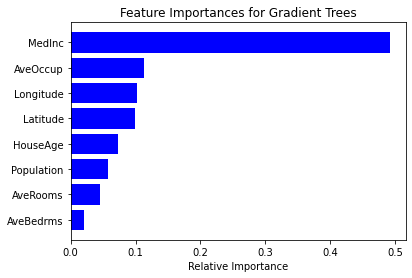

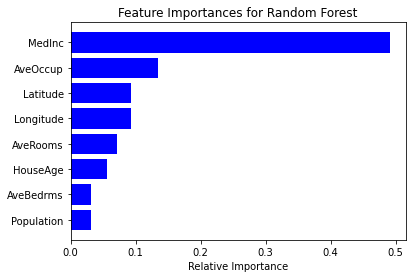

In [ ]:
# california housing dataset from sklearn
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create regressor
n_trees = 275
cal_reg = Regressor(X_train, X_test, y_train, y_test, cal_housing.feature_names, n_trees)

# train classifier
cal_reg.train_eval(4, 'xgb')
GBM_depth_4 = cal_reg.mae()

cal_reg.train_eval(6,'xgb')
GBM_depth_6 = cal_reg.mae()

cal_reg.plot_importance('xgb')

cal_reg.train_eval(2, 'rf')
RF_m_2 = cal_reg.mae()

cal_reg.train_eval(6, 'rf')
RF_m_6 = cal_reg.mae()

cal_reg.plot_importance('rf')


The graphs above show the relative variable importance for each of the eight predictor variables. The feature with the largest bar is the feature that is the most relevant predictor. For both of the feature importance graphs for the California dataset, median income has the greatest importance, which would make the most sense because the amount of income a person has dictates how much they can afford and is one of the main deciding factors of buying a house. The next three features with the greatest importance are average household members, latitude, and longitude, which is the same for both gradient boost and random forest. The rest of the features are not in the same order and have the least relevance, which means they are less influential. Each feature is plotted w.r.t. its F-score, which is a metric that sums up how many times each feature is split on. 

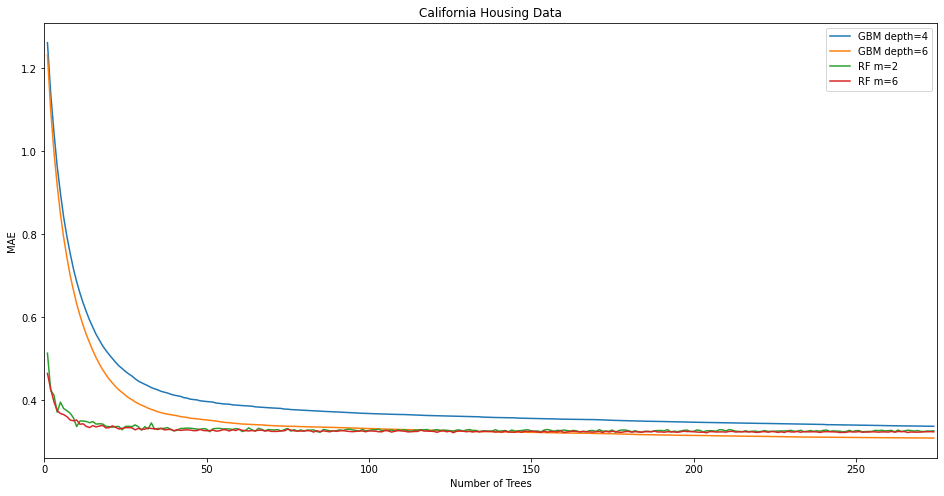

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(cal_reg.trees, GBM_depth_4)
plt.plot(cal_reg.trees, GBM_depth_6)
plt.plot(cal_reg.trees, RF_m_2)
plt.plot(cal_reg.trees, RF_m_6)
plt.legend(['GBM depth=4', 'GBM depth=6', 'RF m=2', 'RF m=6'])
plt.title('California Housing Data')
plt.xlim([0, n_trees])
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
plt.show()

The above graph shows the average absolute error given the number of trees or n estimators for the California housing dataset. For both gradient boosting trees, we can see that as the number of trees increase the average error decreases. We see that the random forest models converge very quickly, and then remain roughly constant after that; their MAE is also a little noisy even after convergence. For the gradient boosted models, they converge slower but the depth=6 model eventually beats the MAE of the random forests, and it looks as though the depth=4 model will also beat the MAE of the random forests given a few more trees (n_estimators). The distinction between the two gradient boosted models' performances is clear, but the random forests are hardly distinguishable for this dataset.

### Boston Housing Dataset
Select another dataset and repeat the analysis. Pick a dataset we have not yet studied in class.

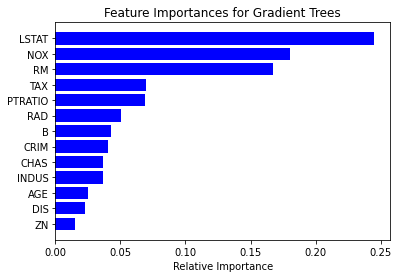

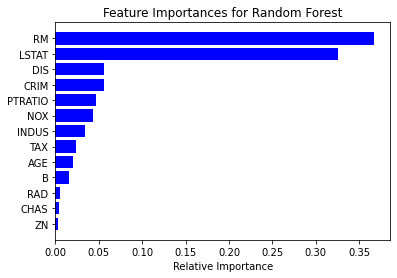

In [ ]:
# boston housing dataset from sklearn
from sklearn.datasets import load_boston
bos_housing = load_boston()
X = pd.DataFrame(bos_housing.data, columns=bos_housing.feature_names)
y = bos_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create classifier
n_trees = 275
bos_reg = Regressor(X_train, X_test, y_train, y_test, bos_housing.feature_names, n_trees)

# train classifier
bos_reg.train_eval(4, 'xgb')
GBM_depth_4 = bos_reg.mae()

bos_reg.train_eval(6, 'xgb')
GBM_depth_6 = bos_reg.mae()

bos_reg.plot_importance('xgb')

bos_reg.train_eval(2, 'rf')
RF_m_2 = bos_reg.mae()

bos_reg.train_eval(6, 'rf')
RF_m_6 = bos_reg.mae()

bos_reg.plot_importance('rf')

The 13 features of the boston dataset include: 
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq. ft
3. INDUS - porportion of non-retail business acres per town
4. CHAS - Charles River dummy variable 
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE -proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population

The features from the gradient boosting trees and random forest feature importance graphs differ slightly. From the gradient boosting tree graph, LSTAT has the greatest relevancy which means the lower percentage of the status of the population has the greatest relavancy of who buys houses in Boston. In addition NOX and RM have the next greatest relavancy, which means has some relavancy. In the random forest feature importance graph, RM and LSTAT have the greatest relavancy, which is similar to the other feature importance graph. The rest of the features match in how much relavancy they have to the boston dataset; however, the random forest feature importance graph has more features with close to 0 relative importance, which implies that those features don't have any impact for the datset. 

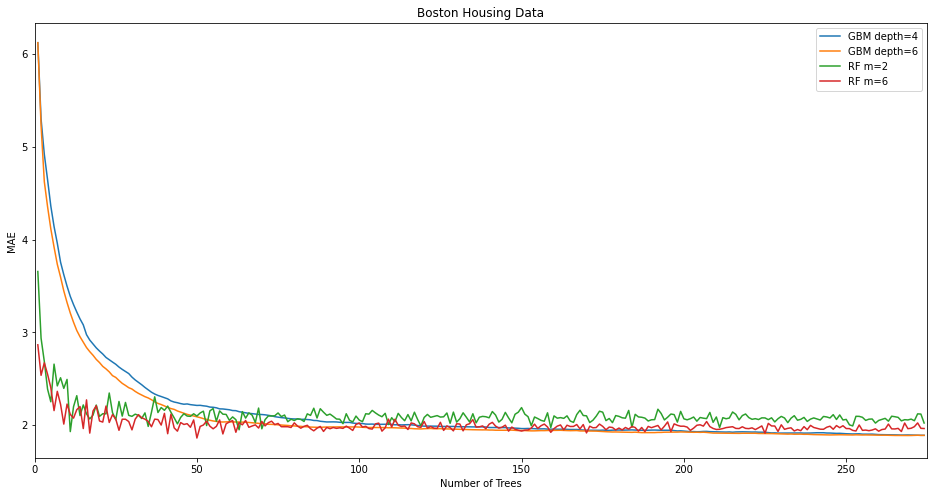

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(bos_reg.trees, GBM_depth_4)
plt.plot(bos_reg.trees, GBM_depth_6)
plt.plot(bos_reg.trees, RF_m_2)
plt.plot(bos_reg.trees, RF_m_6)
plt.legend(['GBM depth=4', 'GBM depth=6', 'RF m=2', 'RF m=6'])
plt.title('Boston Housing Data')
plt.xlim([0, n_trees])
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
plt.show()

The above graph shows the average absolute error given the number of trees or n estimators for the Boston housing dataset. As before, the gradient-boosted trees do slightly better than random forests, but takes longer to reach a minimum. For random forest, the average error, although a little bit noisy, leveled off to a constant number fairly quickly, which shows that we would not need to train it for a large number of trees. Here the distinction between the two random forest models is more clear than in the California dataset example: the higher `m` (maximum number of features per tree) has a noticeably lower MAE. On the other hand, the two gradient-boosted tree models converge to nearly the same value, although we see that the higher depth converges to that value faster.